In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

## フィッシャーのアヤメ

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。


これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。


- Iris setosa
- Iris virgicolor
- Iris virginica

setosa、virgiclor、virginicaはここで**目的変数** や**ラベル** と呼ばれるものに当たります。


1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を **特徴量** と呼びます。

## データセットの準備

scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

### 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

In [2]:
iris = load_iris()

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。
目的変数も同様にyに格納してください。

In [3]:
X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(iris.target, columns = ['Species'])
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


### 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [4]:
df = pd.concat([X,y], axis = 1)
print(df)

     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


### 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

#### ↓先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）

df.head()によって表示させてサンプルでは、5列とも全て数値データである。
最後の列は整数データ、その他は浮動小数点のデータである。文字データは見当たらない。

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### ↓ラベルごとのサンプル数の合計を出力する。

In [6]:
df.sum()

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
Species         150.0
dtype: float64

#### ↓特徴量に欠損値があるかを確認する。

df.info()では、元のインデックス数と各列の特徴量の数が変わらない為欠損値は無い
df.insull().sum()で各列に対しての欠損値の数を示したが全て0だった為欠損値は無い

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

#### ↓特徴量の平均値と標準偏差、四分位数を一度に表示させる。

mean = 平均値

std = 標準偏差

25%,50%,75% = 四分位数

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

#### データセットの説明

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### データセットの形状

In [11]:
iris.data.shape

(150, 4)

#### 花の種類

In [12]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


#### ペアプロット

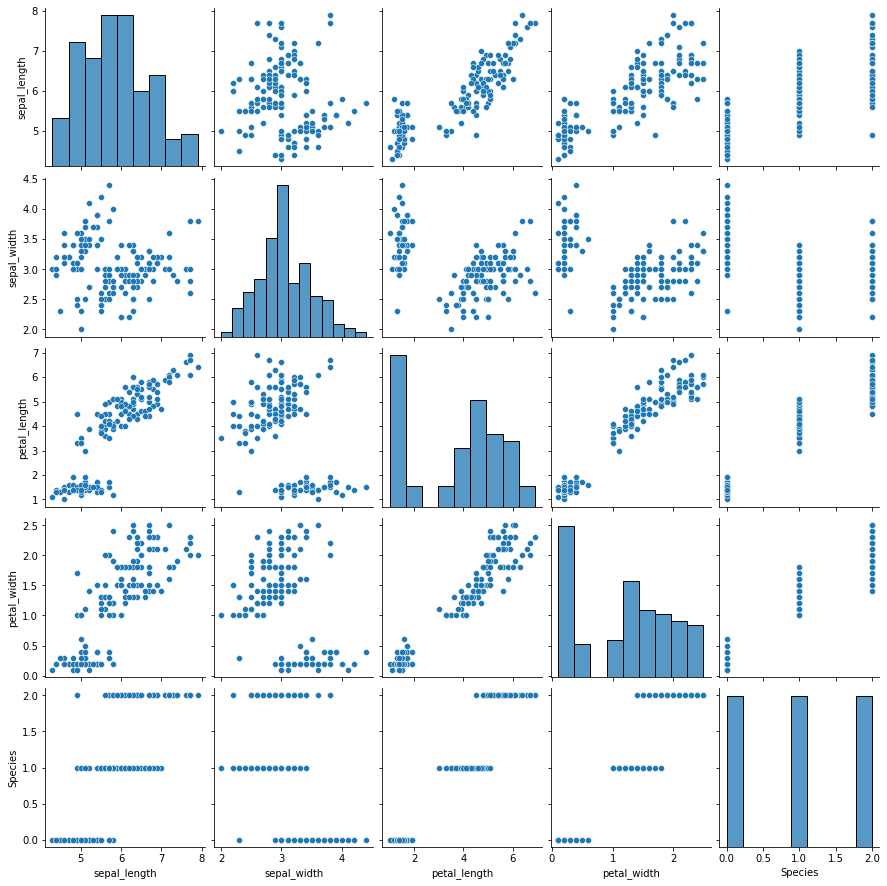

In [13]:
sns.pairplot(df)

### 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

#### ↓sepal_widthの列を３つの異なる方法で抽出する

**1つ目**

In [14]:
df[['sepal_width']]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


**2つ目**

In [15]:
df.loc[:, ['sepal_width']]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [16]:
df.iloc[: , [1]]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


#### ↓50番目から99番目までのデータを抽出する

In [17]:
df.loc[50:99]
#df.iloc[50:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


#### ↓petal_lengthの列の50番目から99番目までのデータを抽出する

In [18]:
#df.loc[50:99, ['petal_length']]
df.iloc[50:100, [2]]

,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


#### ↓petal_widthの値が0.2のデータを抽出する

In [19]:
df[df.petal_width ==0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


### 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

#### ↓ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

([<matplotlib.patches.Wedge at 0x7fe80a863220>,
 [Text(0.4763139806638938, 0.2749999851347557, 'setosa'),
  Text(-5.14947163240028e-08, -0.5499999999999977, 'virgicolor'),
  Text(-0.4763139291691718, 0.2750000743262176, 'virginica')],
 [Text(0.9959292322972324, 0.5749999689181254, '33.3%'),
  Text(-1.076707704956422e-07, -1.149999999999995, '33.3%'),
  Text(-0.99592912462645, 0.575000155409364, '33.3%')])

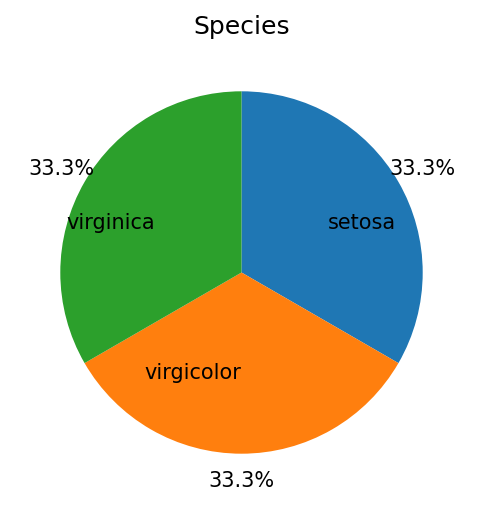

In [20]:
count0 = Counter(df.Species)
ranked_data0 = count0.most_common()
labels0 = [x[0] for x in ranked_data0]
labels1 = ['setosa', 'virgicolor', 'virginica']
values0 = [x[1] for x in ranked_data0]
plt.figure(dpi = 150)
plt.title('Species')
plt.pie(values0, labels = labels1 ,labeldistance = 0.55, startangle=90, 
           counterclock=False, autopct='%.1f%%', pctdistance=1.15)

#### ↓特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

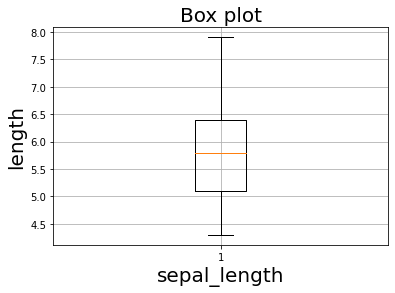

In [21]:
fig0, ax0 = plt.subplots()
bp = ax0.boxplot(df.sepal_length)
#ax0.set_xticklabels(['sepal_length'])
plt.title('Box plot', fontsize = 20)
plt.xlabel('sepal_length', fontsize = 20)
plt.ylabel('length', fontsize = 20)
plt.grid()
plt.show()

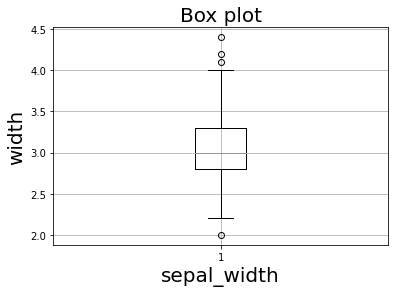

In [22]:
fig1, ax1 = plt.subplots()
bp = ax1.boxplot(df.sepal_width)
#ax0.set_xticklabels(['sepal_width'])
plt.title('Box plot', fontsize = 20)
plt.xlabel('sepal_width', fontsize = 20)
plt.ylabel('width', fontsize = 20)
plt.grid()
plt.show()

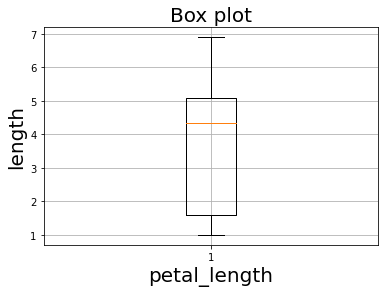

In [23]:
fig2, ax2 = plt.subplots()
bp = ax2.boxplot(df.petal_length)
#ax0.set_xticklabels(['petal_length'])
plt.title('Box plot', fontsize = 20)
plt.xlabel('petal_length', fontsize = 20)
plt.ylabel('length', fontsize = 20)
plt.grid()
plt.show()

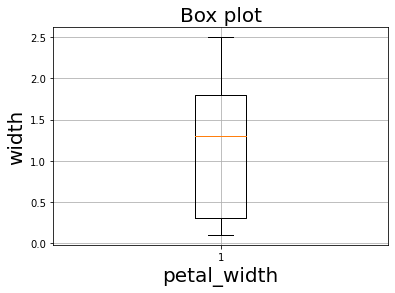

In [24]:
fig3, ax3 = plt.subplots()
bp = ax3.boxplot(df.petal_width)
#ax0.set_xticklabels(['petal_width'])
plt.title('Box plot', fontsize = 20)
plt.xlabel('petal_width', fontsize = 20)
plt.ylabel('width', fontsize = 20)
plt.grid()
plt.show()

#### ↓特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

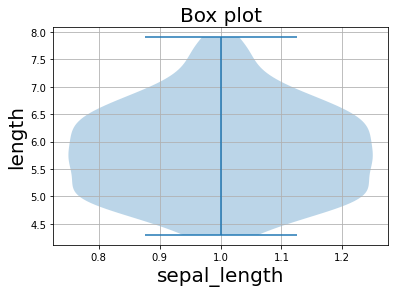

In [25]:
plt.violinplot(df.sepal_length)
plt.title('Box plot', fontsize = 20)
plt.xlabel('sepal_length', fontsize = 20)
plt.ylabel('length', fontsize = 20)
plt.grid()
plt.show()

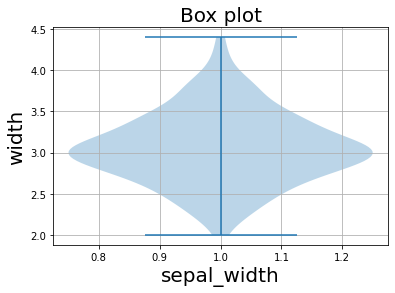

In [26]:
plt.violinplot(df.sepal_width)
plt.title('Box plot', fontsize = 20)
plt.xlabel('sepal_width', fontsize = 20)
plt.ylabel('width', fontsize = 20)
plt.grid()
plt.show()

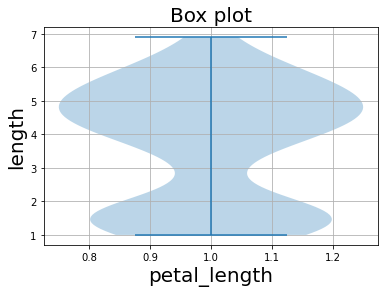

In [27]:
plt.violinplot(df.petal_length)
plt.title('Box plot', fontsize = 20)
plt.xlabel('petal_length', fontsize = 20)
plt.ylabel('length', fontsize = 20)
plt.grid()
plt.show()

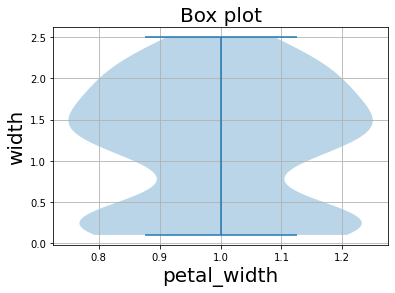

In [28]:
plt.violinplot(df.petal_width)
plt.title('Box plot', fontsize = 20)
plt.xlabel('petal_width', fontsize = 20)
plt.ylabel('width', fontsize = 20)
plt.grid()
plt.show()

#### ↓箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

- どう違うか

**箱ひげ図**→四分位数の範囲と最大値と最小値が参照される。データのばらつきが把握出来る。

**バイオリン図**→箱ひげ図では参照出来ない、全体の数値を参照出来る。

- それぞれの利点

**箱ひげ図**→データのばらつきが分かりやすい。品質管理で用いられる。外れ値に影響を受けない

**バイオリン図**→全ての分布データを参照出来る。ピーク値を複数参照出来る。



### 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。


- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る(１つ)

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

#### ↓縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)

In [29]:
print(iris.target_names)
#アヤメのデータをアヤメの種類毎に分ける
iris_dataframe1 = pd.DataFrame(iris.data[:50]) # setosa
iris_dataframe2 = pd.DataFrame(iris.data[50:100]) # versicolor
iris_dataframe3 = pd.DataFrame(iris.data[100:150]) # virginica

['setosa' 'versicolor' 'virginica']


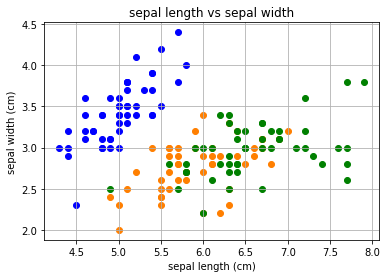

In [30]:
#matplotlibで散布図を描く
plt.scatter(iris_dataframe1[0], iris_dataframe1[1], c="b")
plt.scatter(iris_dataframe2[0], iris_dataframe2[1], c="#ff7f00")
plt.scatter(iris_dataframe3[0], iris_dataframe3[1], c="g")


#以下で散布図の見た目の設定をしています。
plt.title('sepal length vs sepal width')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.grid(True)

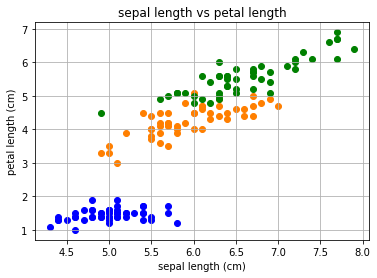

In [31]:
#matplotlibで散布図を描く
plt.scatter(iris_dataframe1[0], iris_dataframe1[2], c="b")
plt.scatter(iris_dataframe2[0], iris_dataframe2[2], c="#ff7f00")
plt.scatter(iris_dataframe3[0], iris_dataframe3[2], c="g")

#以下で散布図の見た目の設定をしています。
plt.title('sepal length vs petal length')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.grid(True)

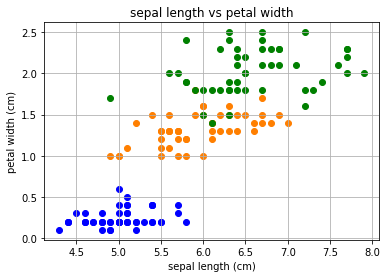

In [32]:
#matplotlibで散布図を描く
plt.scatter(iris_dataframe1[0], iris_dataframe1[3], c="b")
plt.scatter(iris_dataframe2[0], iris_dataframe2[3], c="#ff7f00")
plt.scatter(iris_dataframe3[0], iris_dataframe3[3], c="g")

#以下で散布図の見た目の設定をしています。
plt.title('sepal length vs petal width')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.grid(True)

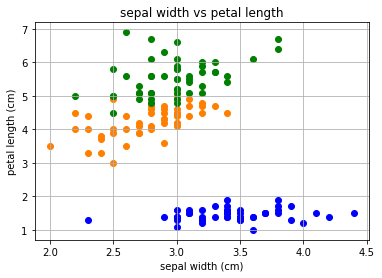

In [33]:
#matplotlibで散布図を描く
plt.scatter(iris_dataframe1[1], iris_dataframe1[2], c="b")
plt.scatter(iris_dataframe2[1], iris_dataframe2[2], c="#ff7f00")
plt.scatter(iris_dataframe3[1], iris_dataframe3[2], c="g")

#以下で散布図の見た目の設定をしています。
plt.title('sepal width vs petal length')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)')
plt.grid(True)

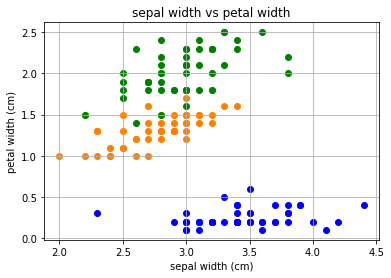

In [34]:
#matplotlibで散布図を描く
plt.scatter(iris_dataframe1[1], iris_dataframe1[3], c="b")
plt.scatter(iris_dataframe2[1], iris_dataframe2[3], c="#ff7f00")
plt.scatter(iris_dataframe3[1], iris_dataframe3[3], c="g")

#以下で散布図の見た目の設定をしています。
plt.title('sepal width vs petal width')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')
plt.grid(True)

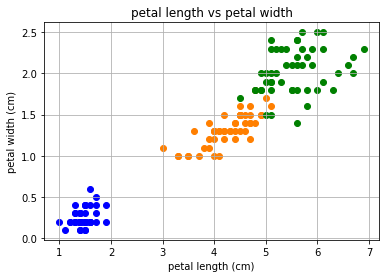

In [35]:
#matplotlibで散布図を描く
plt.scatter(iris_dataframe1[2], iris_dataframe1[3], c="b")
plt.scatter(iris_dataframe2[2], iris_dataframe2[3], c="#ff7f00")
plt.scatter(iris_dataframe3[2], iris_dataframe3[3], c="g")

#以下で散布図の見た目の設定をしています。
plt.title('petal length vs petal width')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.grid(True)

#### ↓全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)

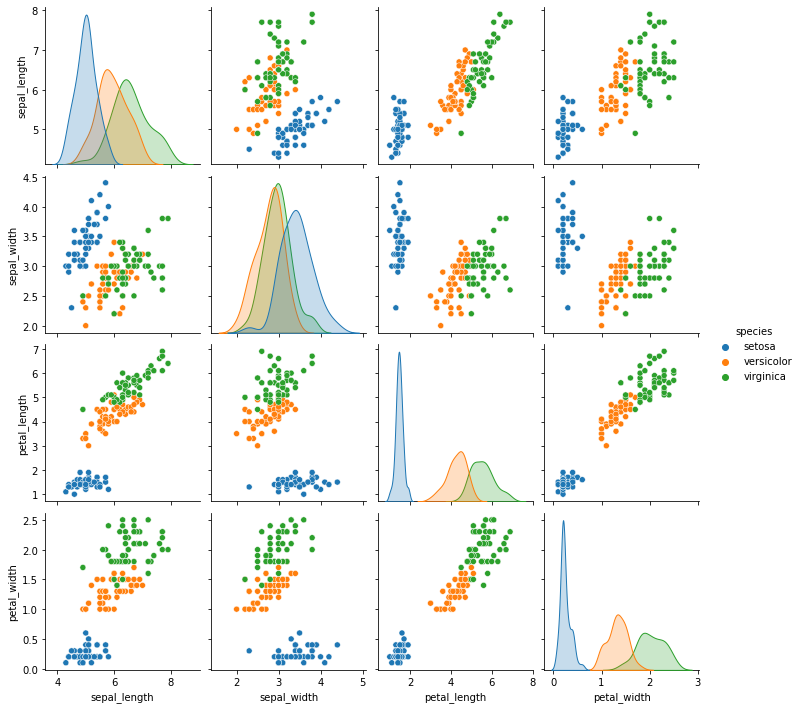

In [36]:
iris1 = sns.load_dataset("iris")  # アヤメの計測データ読み込み
sns.pairplot(iris1, hue='species') # 散布図行列の描画、カテゴリで色分け

#### ↓４つの特徴量に関する相関係数行列を作る

In [44]:
correlation_matrix = np.corrcoef(iris.data.transpose())
print(correlation_matrix)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


#### ↓相関係数行列のヒートマップを作る(１つ)

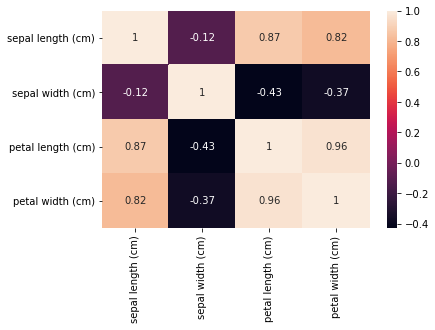

In [42]:
# 1に近いほど正の相関関係、-1に近いほど負の相関関係、0に近いほど相関関係がない
sns.heatmap(correlation_matrix, annot=True, xticklabels = iris.feature_names, yticklabels=iris.feature_names)
plt.show()

### 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。


例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

- setosaに関しては唯一sepal length とwidthにおいて正の相関関係が見てとれた
- virgicolorとvirginicaに関してはほぼどの特徴量同士でも正の相関関係があった
<!-- - setosaがどの特徴量同士でも相関関係が0に近いが他の2種の正の相関関係の値が1に近い為特徴量同士の相関関係が正に寄っている -->
- virginicaはどの特徴量もほとんどの場合値が大きい
- setosaがsepal widthのみ他のアヤメよりも大きい